In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [159]:
# reading the dataset
df=pd.read_csv("diabetes.csv")

In [160]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


so here i am trying to predict woman with diabetes using the below factors

number of pregnancies

amount of glucose in the system

blood pressure

skin thickness

insulin

bmi(Body Mass Index)

diabetes pedigree function

age 



In [161]:
# data cleaning

#standard missing value 
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# perfoming bivariate analysis

In [162]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [163]:
chart1 = px.scatter(data_frame=df,
           x="BMI",
           y="Pregnancies",
           color="Outcome",
                     title="checking the relationship between number of pregnancies and BMI In relation to Outcome")
chart1

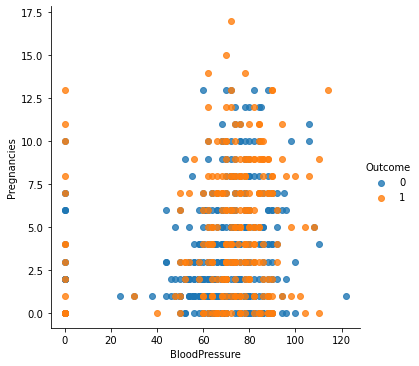

In [164]:
#Scatter Plot
sns.lmplot(x='BloodPressure', y='Pregnancies', hue='Outcome', fit_reg=False, data=df)

from the above analysis it looks like woman who have 50mmHg to 85mmHg are prone to have diabetes

In [165]:
#Scatter Plot Matrix
#sns.pairplot(hue='Outcome', data=df)

In [166]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# checking for outliers and removing them

In [167]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='Pregnancies'>

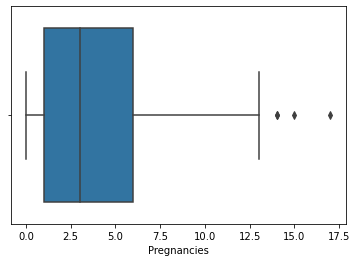

In [168]:
sns.boxplot(df.Pregnancies)

<AxesSubplot:xlabel='Pregnancies'>

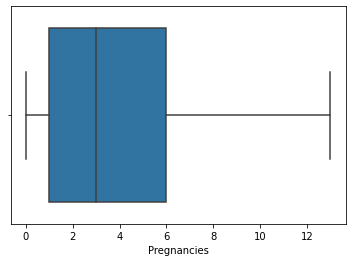

In [169]:
#Option: Z-score or IQR, z-score only for Gaugassian distribution => IQR

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.Pregnancies)

df = df.loc[(df.Pregnancies > lower) & (df.Pregnancies < upper)]

sns.boxplot(df.Pregnancies)

<AxesSubplot:xlabel='Glucose'>

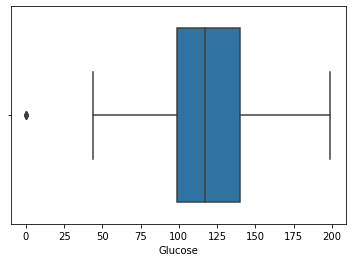

In [170]:
sns.boxplot(df.Glucose)

<AxesSubplot:xlabel='Glucose'>

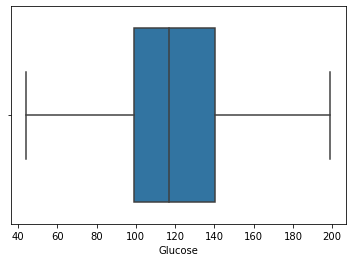

In [171]:
lower, upper = remove_outlier(df.Glucose)

df = df.loc[(df.Glucose > lower) & (df.Glucose < upper)]

sns.boxplot(df.Glucose)

<AxesSubplot:xlabel='BloodPressure'>

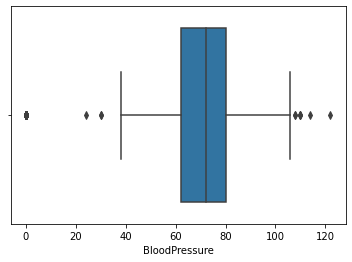

In [172]:
sns.boxplot(df.BloodPressure)

<AxesSubplot:xlabel='BloodPressure'>

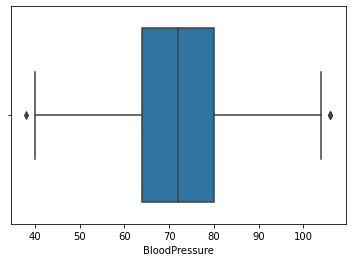

In [173]:
lower, upper = remove_outlier(df.BloodPressure)

df = df.loc[(df.BloodPressure > lower) & (df.BloodPressure < upper)]

sns.boxplot(df.BloodPressure)

<AxesSubplot:xlabel='SkinThickness'>

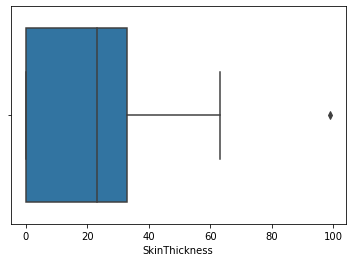

In [174]:
sns.boxplot(df.SkinThickness)

<AxesSubplot:xlabel='BMI'>

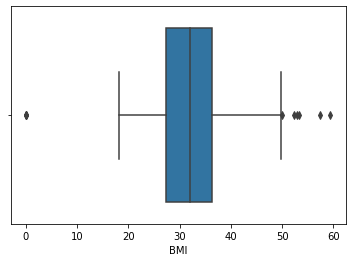

In [175]:
sns.boxplot(df.BMI)

<AxesSubplot:xlabel='BMI'>

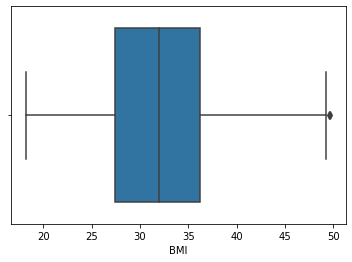

In [176]:
lower, upper = remove_outlier(df.BMI)

df = df.loc[(df.BMI > lower) & (df.BMI < upper)]

sns.boxplot(df.BMI)

<AxesSubplot:xlabel='Age'>

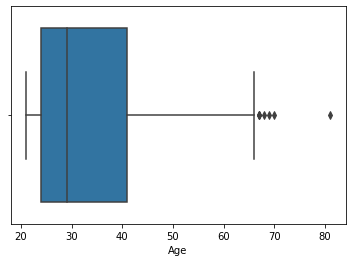

In [177]:
sns.boxplot(df.Age)

<AxesSubplot:xlabel='Age'>

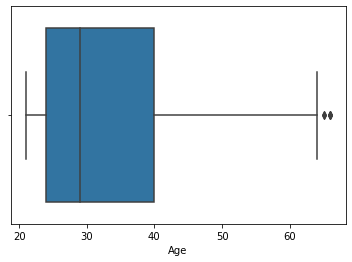

In [178]:
lower, upper = remove_outlier(df.Age)

df = df.loc[(df.Age > lower) & (df.Age < upper)]

sns.boxplot(df.Age)

In [179]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [180]:
# dealing with imbalanced data

count_class_0, count_class_1 = df.Outcome.value_counts()
target_class_0 = df[df['Outcome'] == 0]
target_class_1 = df[df['Outcome'] == 1]

Random over-sampling:
1    463
0    463
Name: Outcome, dtype: int64


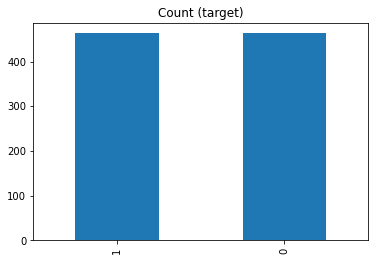

In [181]:
data_class_1_over = target_class_1.sample(count_class_0, replace=True)
data_test_over = pd.concat([target_class_0, data_class_1_over], axis=0)
print('Random over-sampling:')
print(data_test_over.Outcome.value_counts())
data_test_over.Outcome.value_counts().plot(kind='bar', title='Count (target)');

In [182]:
data_test_over

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
586,8,143,66,0,0,34.9,0.129,41,1
99,1,122,90,51,220,49.7,0.325,31,1
366,6,124,72,0,0,27.6,0.368,29,1
323,13,152,90,33,29,26.8,0.731,43,1


In [183]:
# Create X (all the feature columns)
x = data_test_over.drop("Outcome", axis=1)

# Create y (the target column)
y = data_test_over["Outcome"]

In [184]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
10,4,110,92,0,0,37.6,0.191,30
12,10,139,80,0,0,27.1,1.441,57
...,...,...,...,...,...,...,...,...
586,8,143,66,0,0,34.9,0.129,41
99,1,122,90,51,220,49.7,0.325,31
366,6,124,72,0,0,27.6,0.368,29
323,13,152,90,33,29,26.8,0.731,43


In [185]:
y

1      0
3      0
5      0
10     0
12     0
      ..
586    1
99     1
366    1
323    1
64     1
Name: Outcome, Length: 926, dtype: int64

In [186]:
# check if balanced data set 
y.head(), y.value_counts()

(1     0
 3     0
 5     0
 10    0
 12    0
 Name: Outcome, dtype: int64,
 1    463
 0    463
 Name: Outcome, dtype: int64)

In [187]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((694, 8), (232, 8), (694,), (232,))

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [189]:
x_test

array([[-0.59592877,  0.95520668, -1.84063373, ...,  0.98930933,
        -0.73040942, -0.78603595],
       [ 0.33275663, -1.21551812, -0.58573251, ..., -1.32382617,
        -0.42794649, -0.3403587 ],
       [ 2.80925104, -0.63233833, -0.2271893 , ...,  0.26139955,
        -0.69779087,  1.62062118],
       ...,
       [-0.28636697, -0.40554618, -2.01990533, ..., -0.49886176,
         0.41420517, -0.78603595],
       [ 0.02319483, -0.85913047,  0.31062551, ..., -1.51793544,
        -0.7808199 , -1.14257775],
       [ 1.57100384,  1.24679658,  0.48989711, ...,  0.03493874,
        -1.00321911,  0.99667304]])

In [190]:
print(x_train.shape)
print(x_test.shape)

(694, 8)
(232, 8)


In [191]:
print(y_train.shape)
print(y_test.shape)

(694,)
(232,)


# modelling

In [192]:
from sklearn.neighbors import KNeighborsClassifier

In [193]:
from sklearn.neighbors import KNeighborsClassifier
 
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)
 
classifier.score(x_test, y_test)

0.8448275862068966

In [194]:
# best model
from sklearn.neighbors import KNeighborsClassifier
 
classifier_model = KNeighborsClassifier(n_neighbors=1)
weights = ['distance']
metric = ['minkowski']

classifier_model.fit(x_train, y_train)
 
classifier_model.score(x_test, y_test)

0.8448275862068966

In [195]:
# predicting diabetes
patient1=[9,120,71,45,0,33,0.627,25]
patient1 = np.array([patient1])
 
patient1
 
classifier_model.predict(patient1)
 
pred = classifier_model.predict(patient1)
 
if pred[0] == 0:
  print('Patient has diabetes')
else:
  print('Patient has no diabetes')

Patient has no diabetes


In [196]:
# Import pickle Package

import pickle

In [197]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_classifier_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(classifier_model, file)

In [198]:
# saving model using joblib
import joblib
 
joblib.dump(classifier_model, 'model_save2')
 
model2 = joblib.load('model_save2')
 
model2.predict(patient1)

array([1], dtype=int64)

In [199]:
model2.predict(patient1)
if pred[0] == 0:
  print('Patient has diabetes')
else:
  print('Patient has no diabetes')

Patient has no diabetes


Random over-sampling:
1    463
0    463
Name: Outcome, dtype: int64
Best: 0.964333 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.877000 (0.024786) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.877000 (0.024786) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.909667 (0.027626) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.909667 (0.027626) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.936667 (0.021029) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.936667 (0.021029) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.938333 (0.022961) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.938333 (0.022961) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.940667 (0.024074) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.940667 (0.024074) with: {'metr

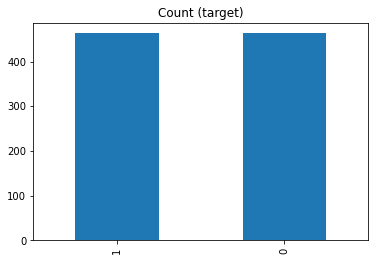

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# reading the dataset
df=pd.read_csv("diabetes.csv")

#Option: Z-score or IQR, z-score only for Gaugassian distribution => IQR

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.Pregnancies)

df = df.loc[(df.Pregnancies > lower) & (df.Pregnancies < upper)]

lower, upper = remove_outlier(df.Glucose)

df = df.loc[(df.Glucose > lower) & (df.Glucose < upper)]

lower, upper = remove_outlier(df.BloodPressure)

df = df.loc[(df.BloodPressure > lower) & (df.BloodPressure < upper)]

lower, upper = remove_outlier(df.BMI)

df = df.loc[(df.BMI > lower) & (df.BMI < upper)]

lower, upper = remove_outlier(df.Age)

df = df.loc[(df.Age > lower) & (df.Age < upper)]


# dealing with imbalanced data

count_class_0, count_class_1 = df.Outcome.value_counts()
target_class_0 = df[df['Outcome'] == 0]
target_class_1 = df[df['Outcome'] == 1]

data_class_1_over = target_class_1.sample(count_class_0, replace=True)
data_test_over = pd.concat([target_class_0, data_class_1_over], axis=0)
print('Random over-sampling:')
print(data_test_over.Outcome.value_counts())
data_test_over.Outcome.value_counts().plot(kind='bar', title='Count (target)');
# splitting the dataset

# Create X (all the feature columns)
x = data_test_over.drop("Outcome", axis=1)

# Create y (the target column)
y = data_test_over["Outcome"]


# Split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
 
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)
 
classifier.score(x_test, y_test)

# hyperparameter tuning
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
x, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    
 # Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_classifier_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(classifier_model, file)

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


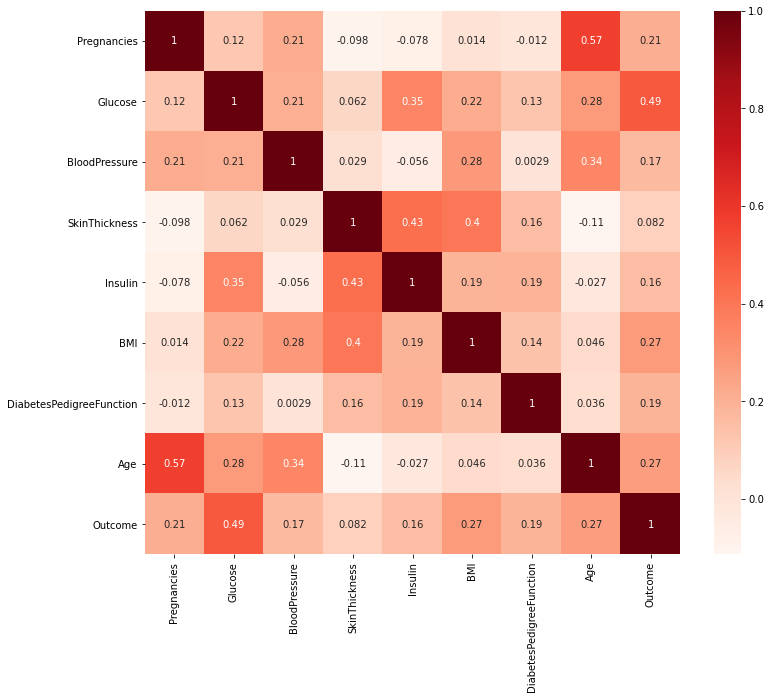

In [203]:
#using pearson correlation
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.Reds)
plt.show()

In [204]:

# correlation with output variable
cor_target=abs(corr['Outcome'])
cor_target

Pregnancies                 0.210744
Glucose                     0.493468
BloodPressure               0.166907
SkinThickness               0.082233
Insulin                     0.158739
BMI                         0.274782
DiabetesPedigreeFunction    0.190134
Age                         0.265312
Outcome                     1.000000
Name: Outcome, dtype: float64

so as we can see that pregnancies,age ,bmi and glucose levels are highly correlated with our output variable so i am going to create my model using these features

In [205]:
#selecting highly correlated features
relevant_feature=cor_target[cor_target>0.2]
relevant_feature

Pregnancies    0.210744
Glucose        0.493468
BMI            0.274782
Age            0.265312
Outcome        1.000000
Name: Outcome, dtype: float64

In [206]:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [207]:
# droping not relevant columns
df_clean=df.drop(columns = ['BloodPressure', 'SkinThickness','Insulin','DiabetesPedigreeFunction'])
df_clean.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


In [208]:
# Create X (all the feature columns)
X = df_clean.drop("Outcome", axis=1)

# Create y (the target column)
y = df_clean["Outcome"]

In [209]:
X

,Pregnancies,Glucose,BMI,Age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


In [210]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((522, 4), (175, 4), (522,), (175,))

In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [212]:
#get dataframe shape
shape = X_test.shape
print('DataFrame Shape :', shape)
print('Number of rows :', shape[0])
print('Number of columns :', shape[1])

DataFrame Shape : (175, 4)
Number of rows : 175
Number of columns : 4


In [218]:
from sklearn.neighbors import KNeighborsClassifier
 
KNC = KNeighborsClassifier(n_neighbors=10)
KNC.fit(X_train, y_train)
 


KNeighborsClassifier(n_neighbors=10)

In [219]:
KNC.score(X_test, y_test)

0.7942857142857143

In [215]:
# predicting diabetes
patient1=[6 , 148 ,33.6 ,50]
patient1 = np.array([patient1])
 
patient1
 
KNC.predict(patient1)
 
pred = KNC.predict(patient1)
 
if pred[0] == 1:
  print('Patient has diabetes')
else:
  print('Patient has no diabetes')

Patient has diabetes


In [221]:
## Save Model using Pickle
 
#import pickle
 
#pickle.dump(model, open('KNC', 'wb'))
 
#final_model = pickle.load(open('KNC', 'rb'))
 
#final_model.predict(patient1)[0]

In [217]:
"""## Save Model using Joblib"""
 
import joblib
 
joblib.dump(KNC, 'model_save2')
 
model3 = joblib.load('model_save2')
 
model3.predict(patient1)
pred = model3.predict(patient1)
 
if pred[0] == 1:
  print('Patient has diabetes')
else:
  print('Patient has no diabetes')

Patient has diabetes
